# House Price Prediction
Description : This is a notebook for visualization of various features which the sales price of houses.

1. Load Data

First lets import all the libraries that will be used to load train and test datasets and data manipulation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


 Loading train and test data

In [2]:
# Get Data in Dataframe 
df_train = pd.read_csv("train_H.csv")
df_test = pd.read_csv("test_H.csv")

Preview of train and test data

In [3]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [4]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

Shape of train and test data

In [5]:
print(df_test.shape)
print(df_train.shape)

(292, 80)
(1168, 81)


In [7]:
fea_na = [features for features in df_train.columns if df_train[features].isnull().sum()>1]
fea_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [9]:
for features in fea_na:
    print(features,np.round(df_train[features].isnull().mean(),4),'%')

LotFrontage 0.1832 %
Alley 0.9341 %
MasVnrType 0.006 %
MasVnrArea 0.006 %
BsmtQual 0.0257 %
BsmtCond 0.0257 %
BsmtExposure 0.0265 %
BsmtFinType1 0.0257 %
BsmtFinType2 0.0265 %
FireplaceQu 0.4717 %
GarageType 0.0548 %
GarageYrBlt 0.0548 %
GarageFinish 0.0548 %
GarageQual 0.0548 %
GarageCond 0.0548 %
PoolQC 0.994 %
Fence 0.7971 %
MiscFeature 0.9623 %


We might want to remove columns with more than 50% missing values

In [10]:
missing_value = [features for features in fea_na if (np.round(df_train[features].isnull().mean(),4)) > 0.5]

In [11]:
missing_value

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

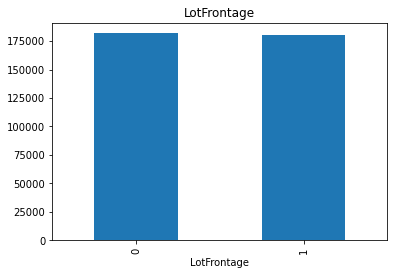

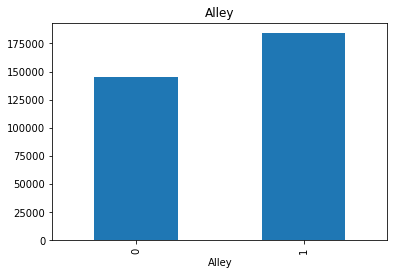

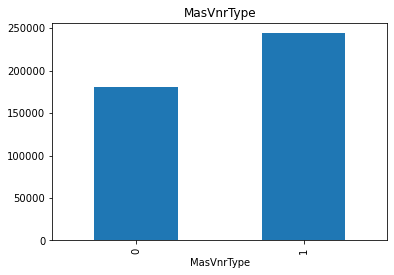

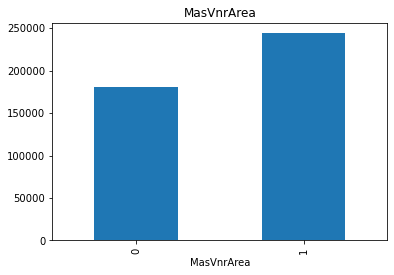

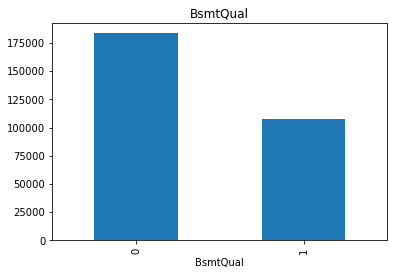

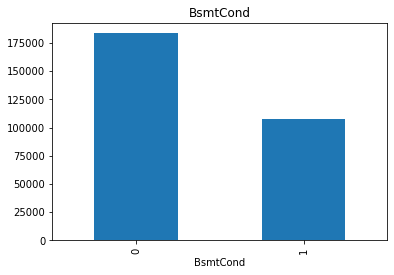

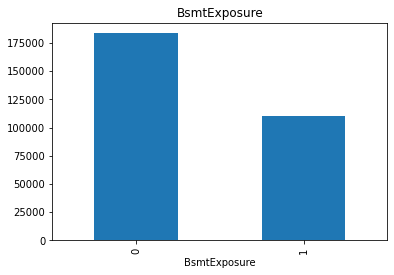

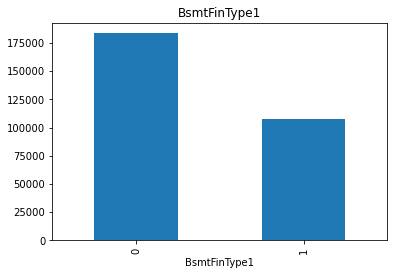

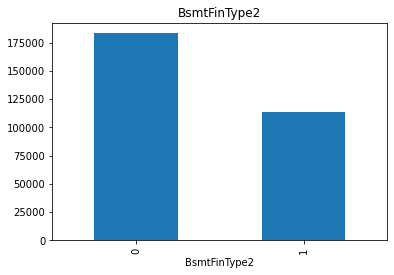

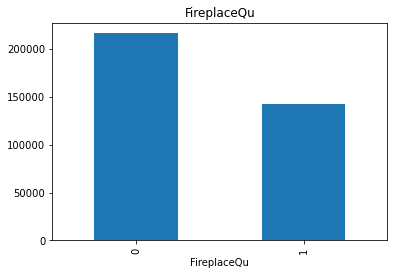

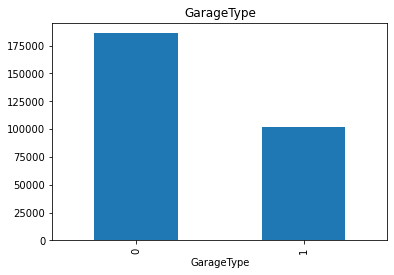

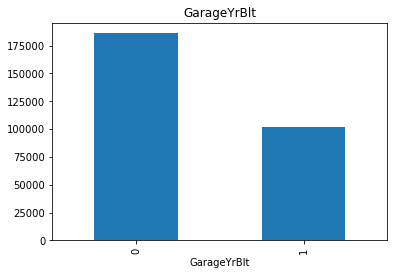

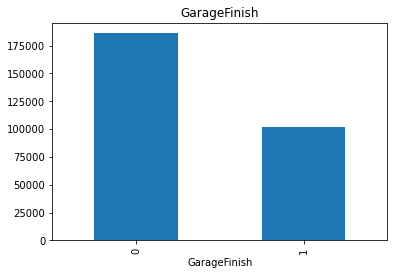

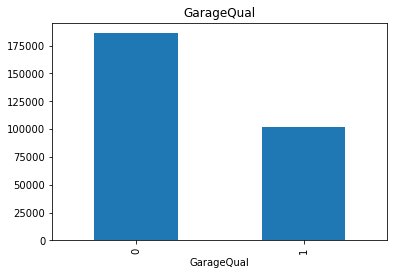

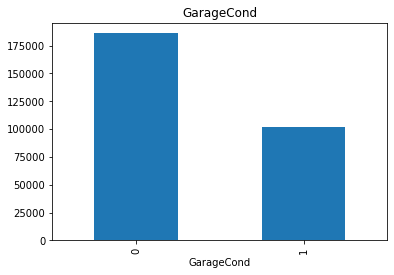

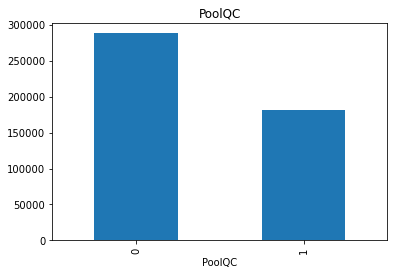

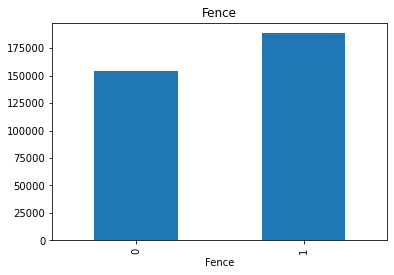

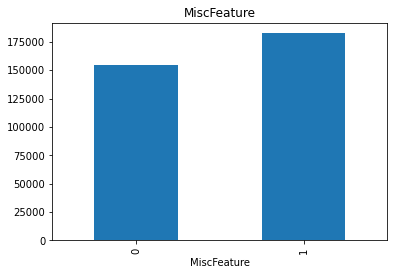

In [13]:
for feature in fea_na:
    data = df_train.copy()
    data[feature] = np.where(data[feature].isnull(),1,0) # replacing missing value with 1 and rest with 0
    data.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.title(feature)
    plt.show()

In [14]:
num_fea = [features for features in df_train.columns if df_train[features].dtypes != 'O']
num_fea

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [16]:
df_train[num_fea].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  127         120          NaN     4928            6            5       1976   
1  889          20         95.0    15865            8            6       1970   
2  793          60         92.0     9920            7            5       1996   
3  110          20        105.0    11751            6            6       1977   
4  422          20          NaN    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          1976         0.0         120  ...           0          205   
1          1970         0.0         351  ...          81          207   
2          1997         0.0         862  ...         180          130   
3          1977       480.0         705  ...           0          122   
4          2000       126.0        1246  ...         240            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2007   
1              0          0          224         0        0      10    2007   
2              0          0            0         0        0       6    2007   
3              0          0            0         0        0       1    2010   
4              0          0            0         0        0       6    2009   

   SalePrice  
0     128000  
1     268000  
2     269790  
3     190000  
4     215000  

[5 rows x 38 columns]

we can see that there are 38 features which are numerical.

In [18]:
year_fea = [features for features in num_fea if "Yr" in features or "Year" in features]
year_fea

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Observing the SalesPrice as per the year sold

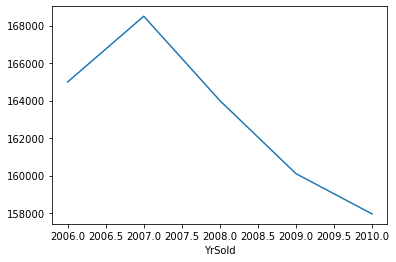

In [19]:
df_train.groupby('YrSold')['SalePrice'].median().plot()

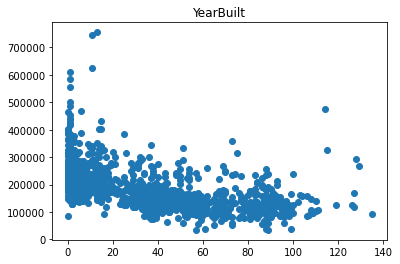

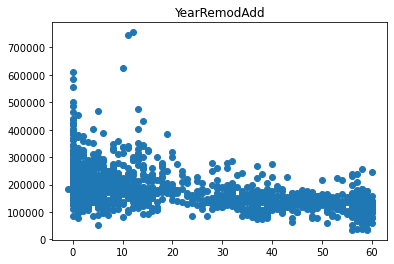

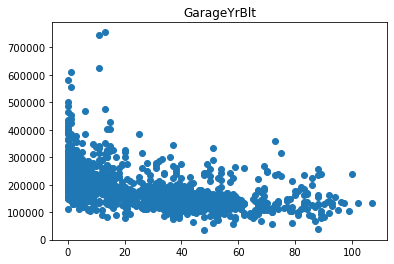

In [20]:
for feature in year_fea:
    if feature != "YrSold":
        data = df_train.copy()
        data[feature] = data['YrSold'] - data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.title(feature)
        plt.show()

In [22]:
discrete_fea = [feature for feature in num_fea if len(df_train[feature].unique())<25 and feature not in year_fea]
discrete_fea

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [24]:
df_train[discrete_fea].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0         120            6            5             0             0   
1          20            8            6             0             1   
2          60            7            5             0             1   
3          20            6            6             0             0   
4          20            6            7             0             0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         0             2             1             5   
1             0         2         0             4             1             8   
2             0         2         1             3             1             8   
3             0         2         0             3             1             7   
4             1         2         0             3             1             8   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           1           2          0         0        0       2  
1           1           2          0         0        0      10  
2           1           2          0         0        0       6  
3           1           2          0         0        0       1  
4           1           2          0         0        0       6

We see that ther are 17 discrete variables

We try to explore its relation with SalePrice

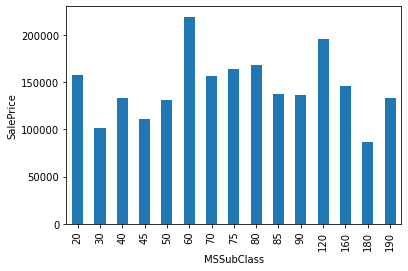

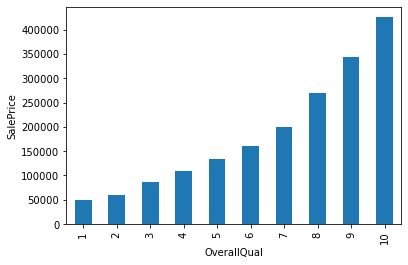

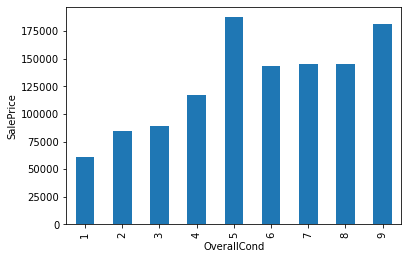

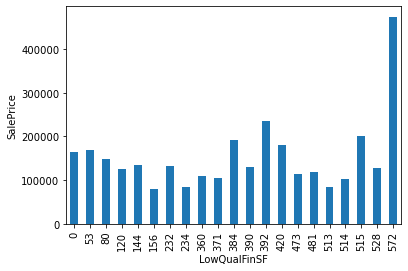

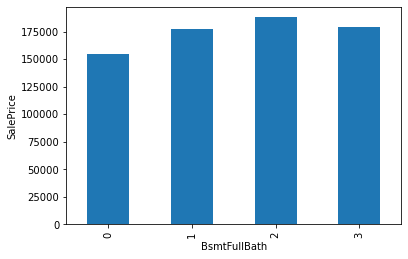

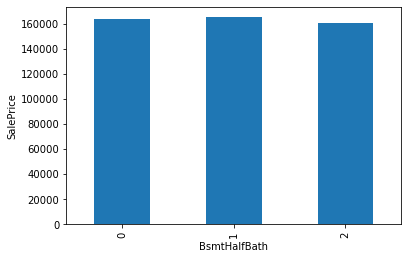

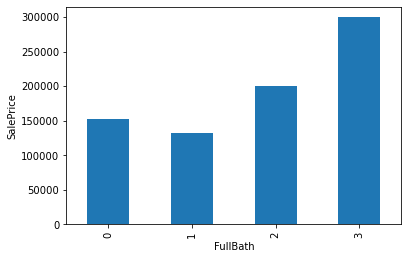

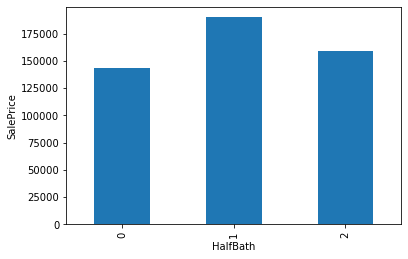

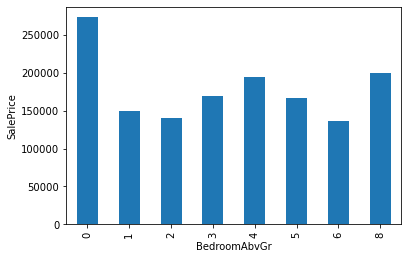

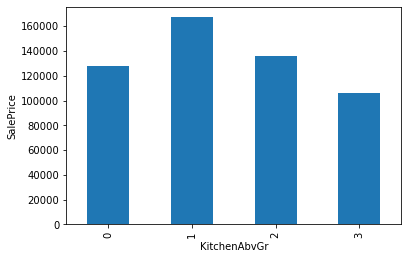

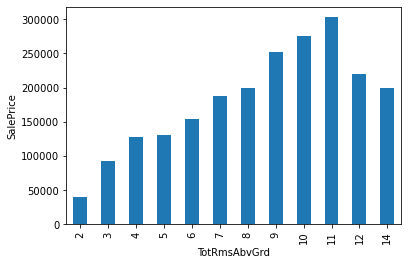

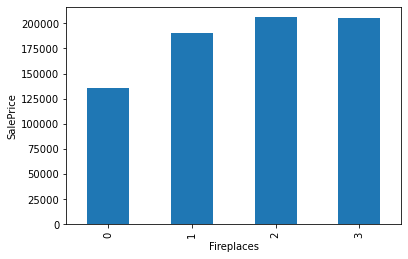

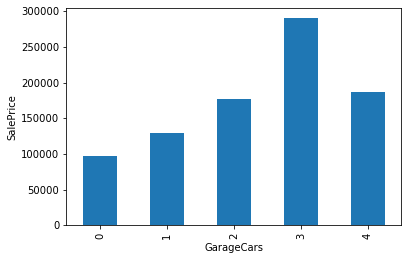

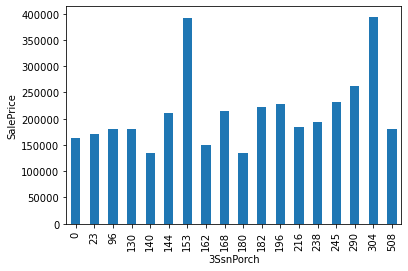

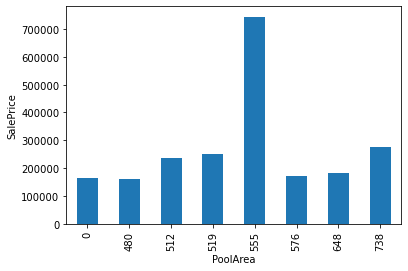

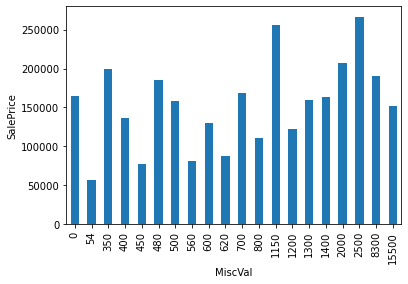

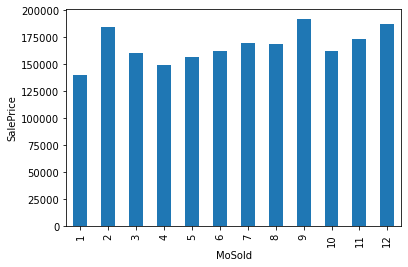

In [25]:
for feature in discrete_fea:
    data = df_train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

Now we see the continous numerical features

In [28]:
continous_fea = [feature for feature in num_fea if feature not in discrete_fea+year_fea+['Id']]
continous_fea

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

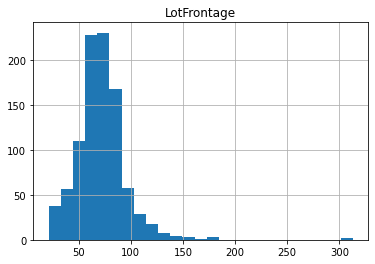

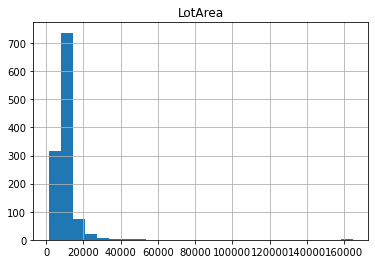

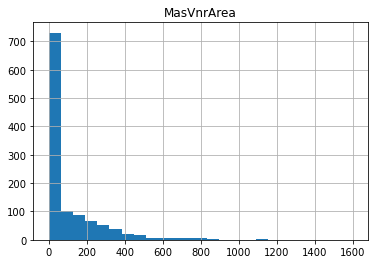

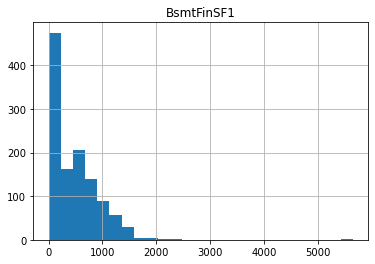

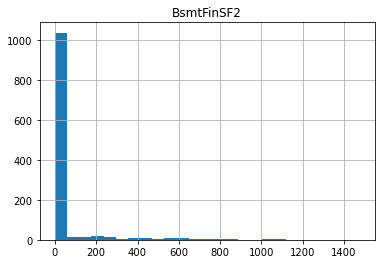

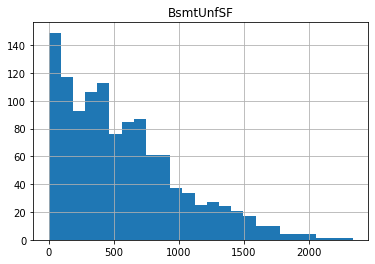

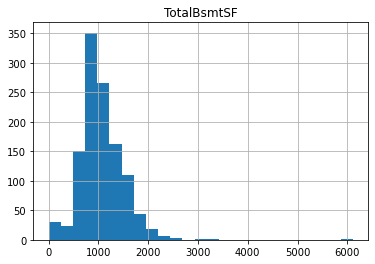

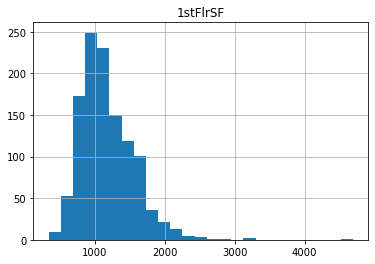

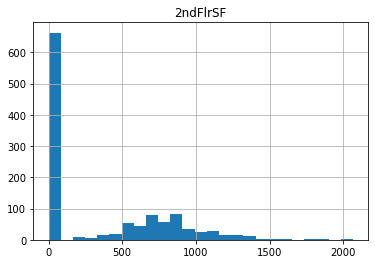

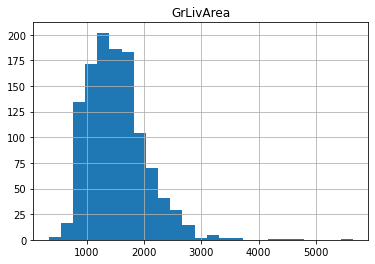

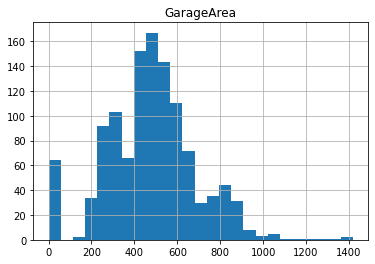

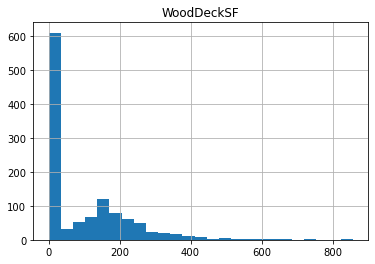

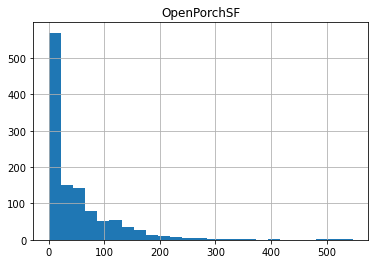

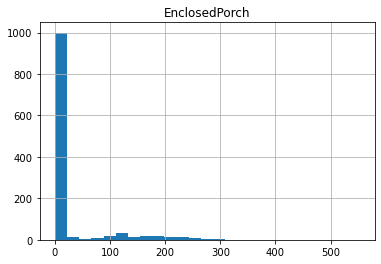

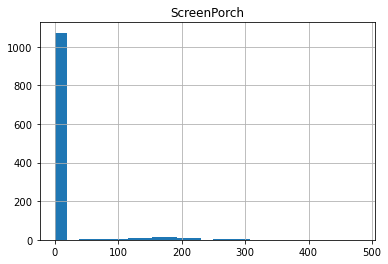

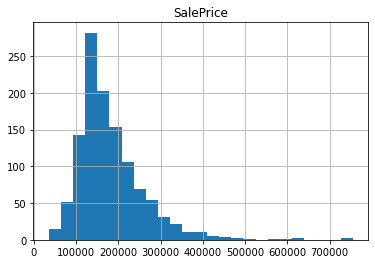

In [29]:
for feature in continous_fea:
    data = df_train.copy()
    data[feature].hist(bins = 25)
    plt.title(feature)
    
    plt.show()

We observe that some of the distributions are gaussian, but others are skewed

We try to normalise the skewed ones with lograthmic transformation

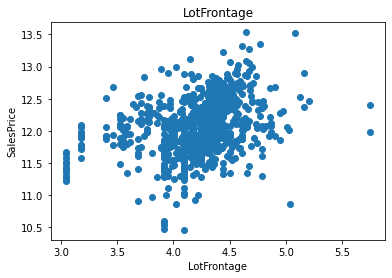

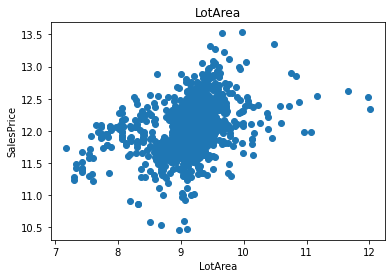

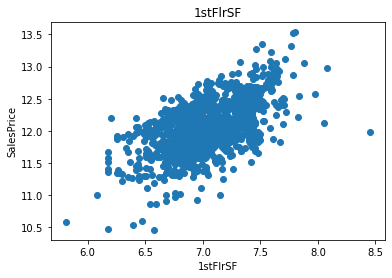

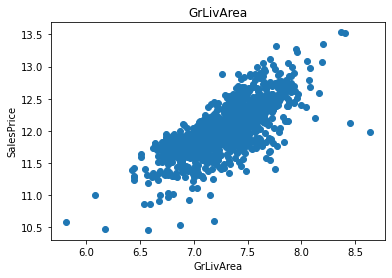

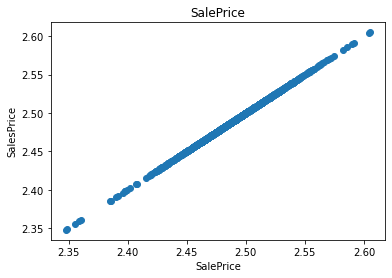

In [30]:
for feature in continous_fea:
    data = df_train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

We see that there is a positive correlation betweent he features and the SalePrice

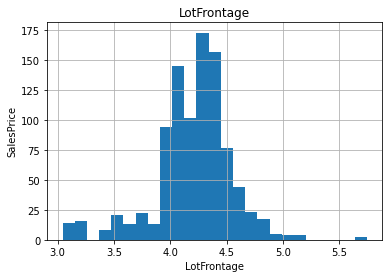

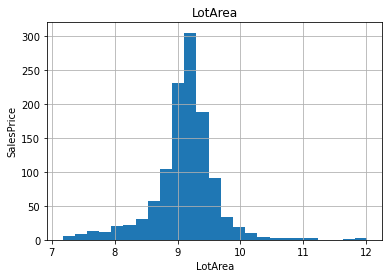

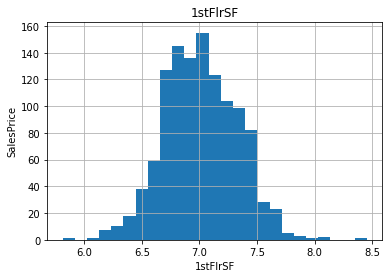

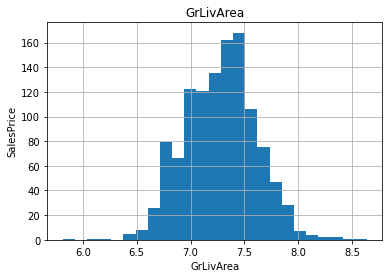

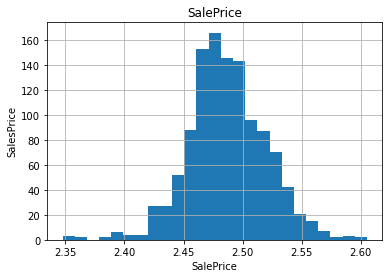

In [32]:
for feature in continous_fea:
    data = df_train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        #plt.scatter(data[feature],data['SalePrice'])
        data[feature].hist(bins = 25)
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

Now we search for outliers

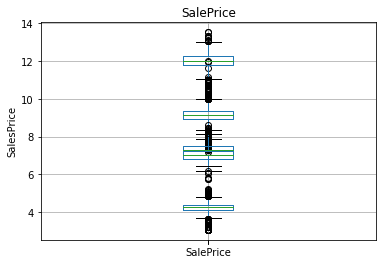

In [33]:
for feature in continous_fea:
    data = df_train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)

In [34]:
cate_fea =[feature for feature in df_train.columns if df_train[feature].dtypes == 'O']
cate_fea

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [35]:
for feature in cate_fea:
    print("Distinct categories for {}  are {}".format(feature,len(df_train[feature].unique())))

Distinct categories for MSZoning  are 5
Distinct categories for Street  are 2
Distinct categories for Alley  are 3
Distinct categories for LotShape  are 4
Distinct categories for LandContour  are 4
Distinct categories for Utilities  are 1
Distinct categories for LotConfig  are 5
Distinct categories for LandSlope  are 3
Distinct categories for Neighborhood  are 25
Distinct categories for Condition1  are 9
Distinct categories for Condition2  are 8
Distinct categories for BldgType  are 5
Distinct categories for HouseStyle  are 8
Distinct categories for RoofStyle  are 6
Distinct categories for RoofMatl  are 8
Distinct categories for Exterior1st  are 14
Distinct categories for Exterior2nd  are 15
Distinct categories for MasVnrType  are 5
Distinct categories for ExterQual  are 4
Distinct categories for ExterCond  are 5
Distinct categories for Foundation  are 6
Distinct categories for BsmtQual  are 5
Distinct categories for BsmtCond  are 5
Distinct categories for BsmtExposure  are 5
Distinct 

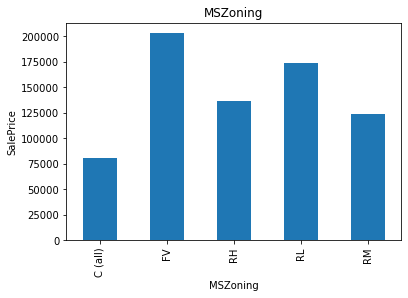

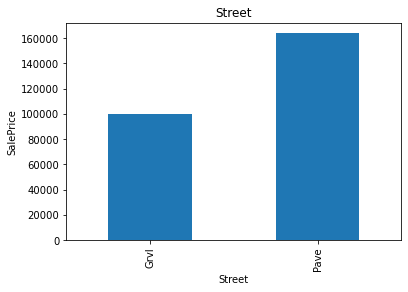

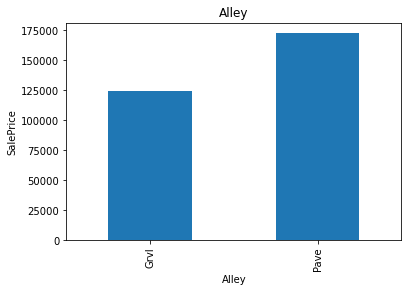

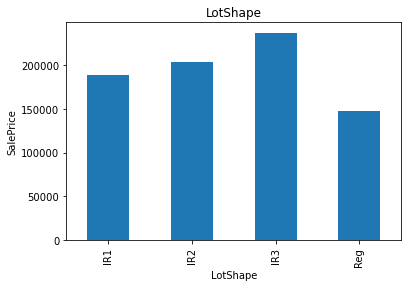

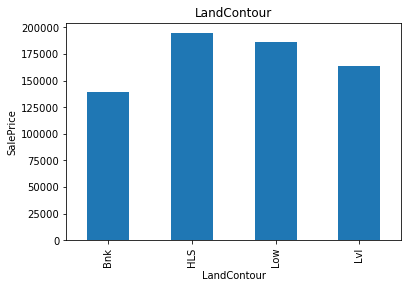

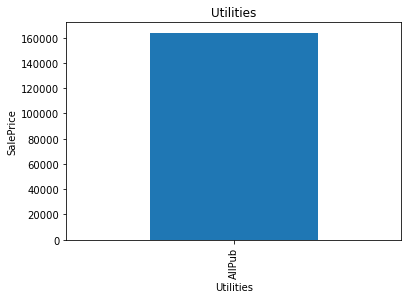

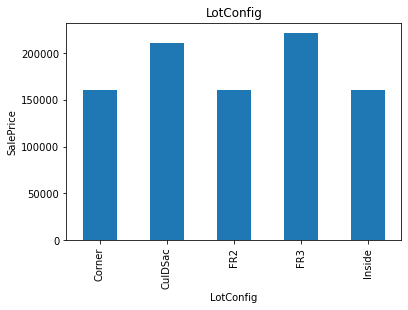

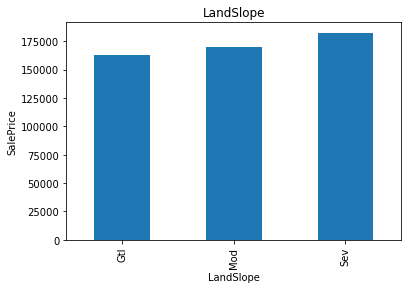

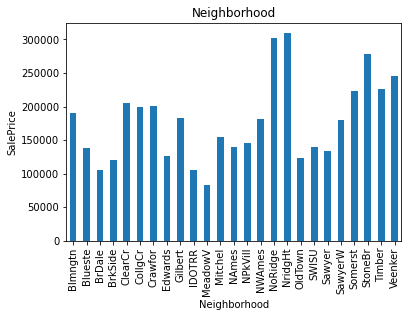

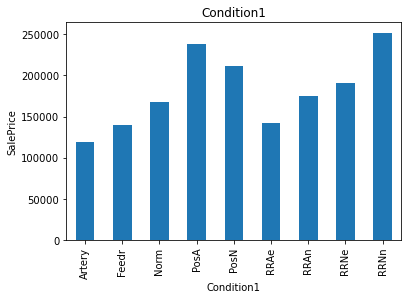

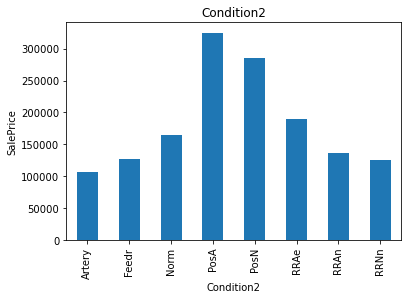

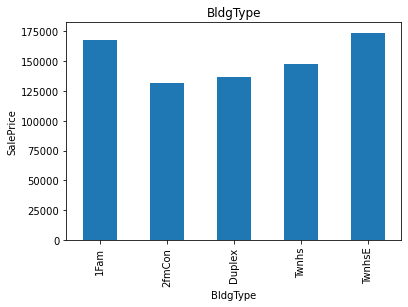

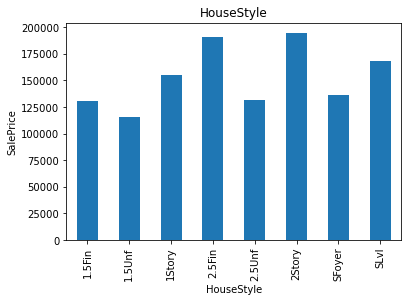

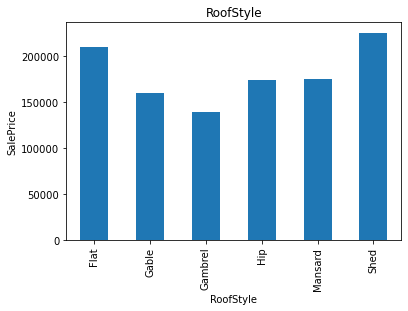

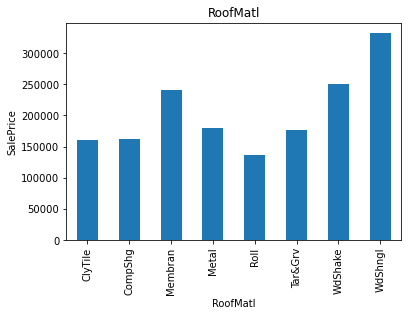

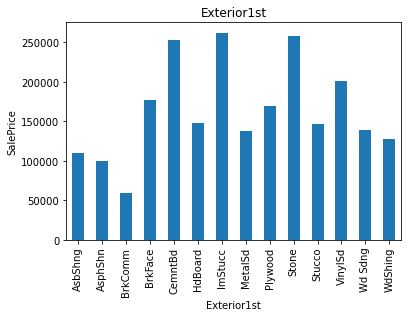

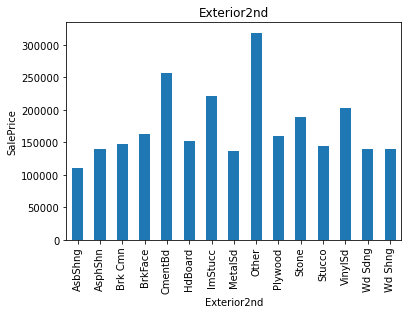

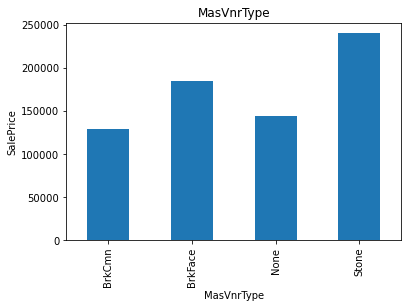

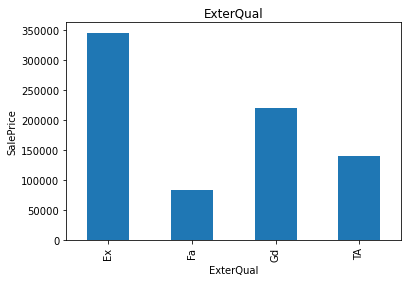

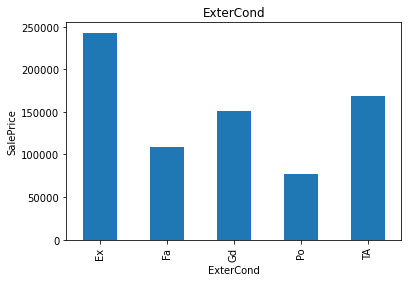

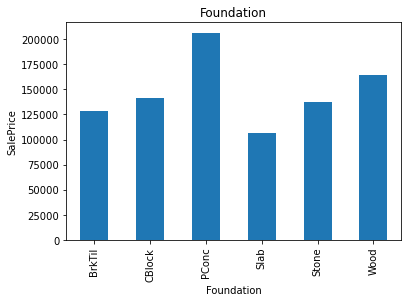

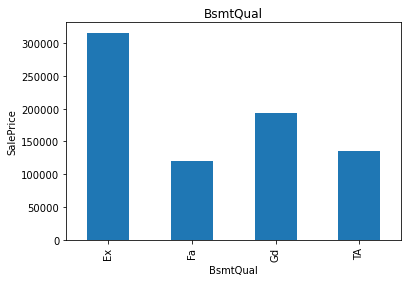

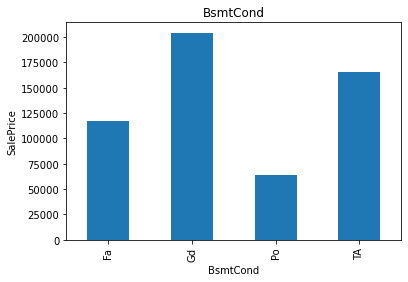

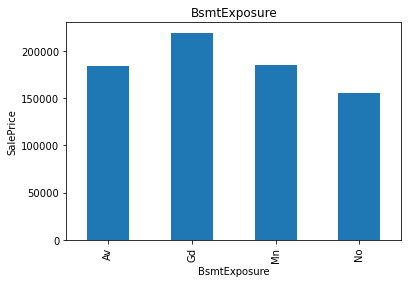

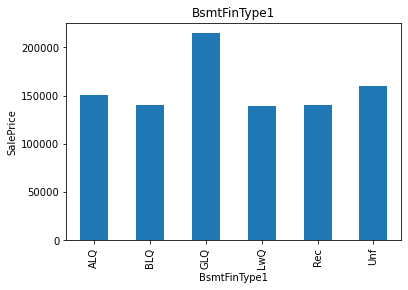

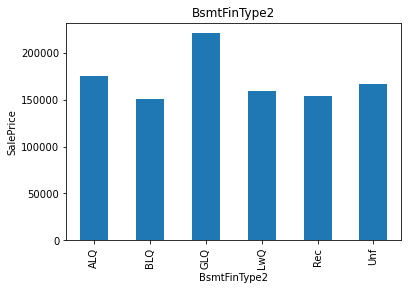

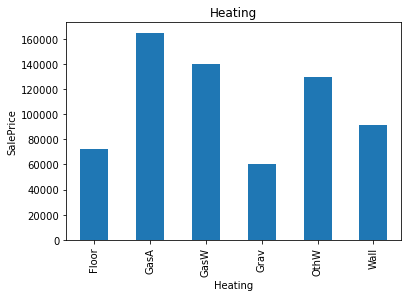

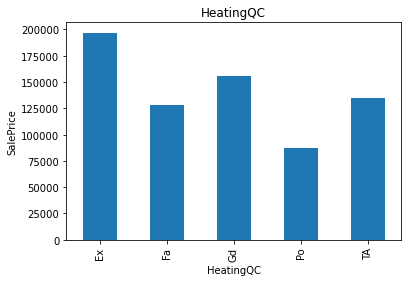

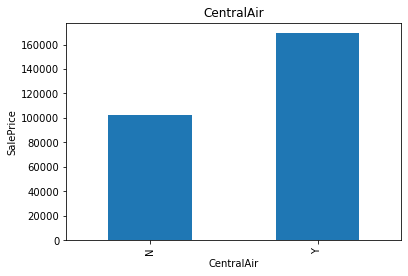

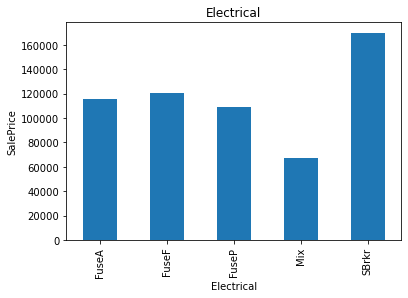

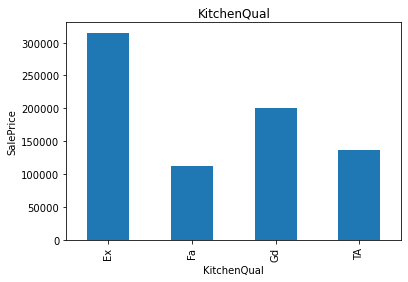

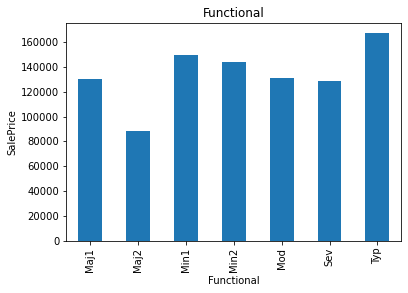

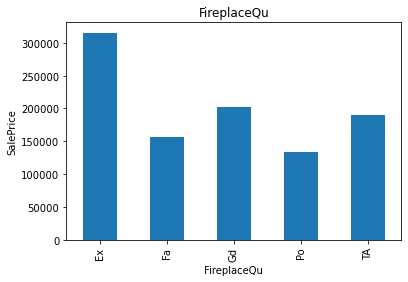

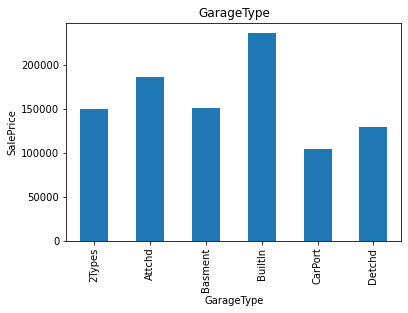

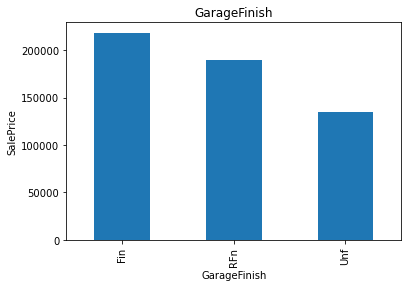

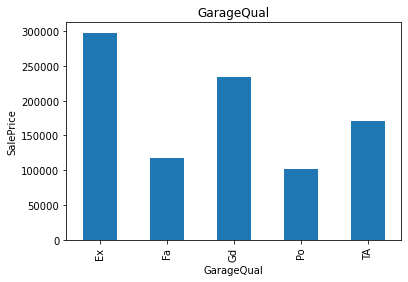

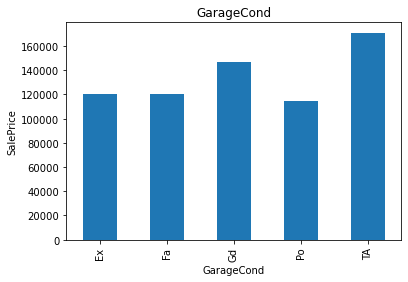

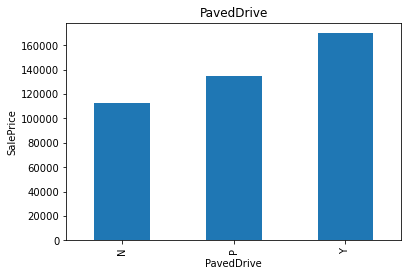

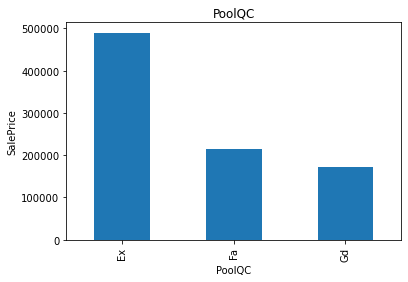

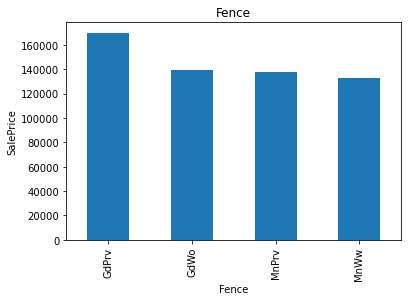

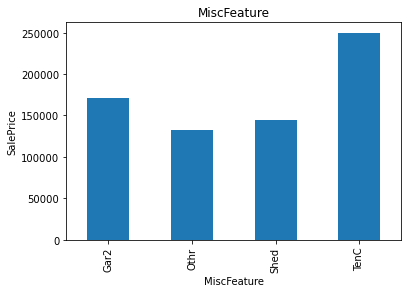

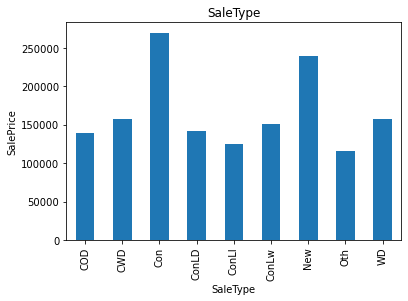

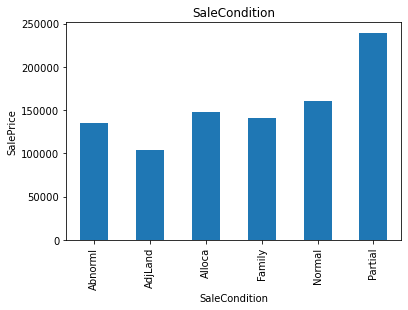

In [36]:
for feature in cate_fea:
    data = df_train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [37]:
df_test.shape

(292, 80)

In [38]:
df_train.shape

(1168, 81)

Null values of train and test data

In [39]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

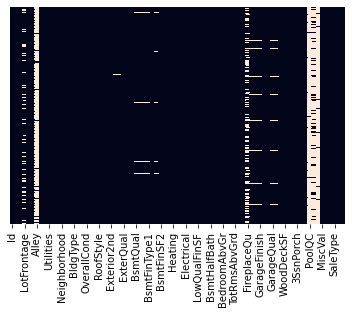

In [40]:
# heatmap for visualizing the null vaues
sns.heatmap(df_train.isnull(),yticklabels = False,cbar = False)

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

# Data cleaning

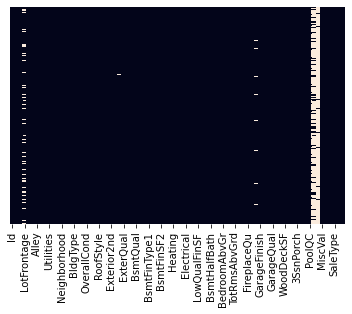

In [44]:
# heatmap for visualizing the null vaues
sns.heatmap(df_train.isnull(),yticklabels = False,cbar = False)

In [46]:
for feature in cate_fea:
    df_train[feature] = df_train[feature].fillna(df_train[feature].mode()) #train
    df_test[feature] = df_test[feature].fillna(df_test[feature].mode())  #test

In [47]:
for feature in discrete_fea:
    df_train[feature] = df_train[feature].fillna(df_train[feature].mode())#train
    df_test[feature] = df_test[feature].fillna(df_test[feature].mode())  #test

In [48]:
for feature in year_fea:
    df_train[feature] = df_train[feature].fillna(df_train[feature].mode())                 #train
    df_test[feature] = df_test[feature].fillna(df_test[feature].mode())  #test

In [49]:
# as sales price is absent in test data so we want to remove it from the feature list
con_num_fea = [feature for feature in continous_fea if feature not in 'SalePrice']

In [50]:
for feature in con_num_fea:
    df_train[feature] = df_train[feature].fillna(df_train[feature].mean()) #train
    df_test[feature] = df_test[feature].fillna(df_test[feature].mean())  #test

In [51]:
for feature in missing_value:
    df_train.drop([feature],axis = 1, inplace = True)
    df_test.drop([feature],axis = 1, inplace = True)

We will also drop the id column as it is not useful for prediction

In [52]:
df_train.drop(['Id'],axis = 1, inplace = True)
df_test.drop(['Id'],axis = 1, inplace = True)

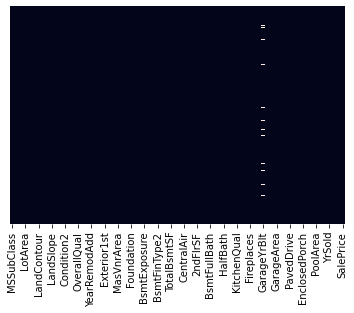

In [53]:
# heatmap for visualizing the null vaues
sns.heatmap(df_train.isnull(),yticklabels = False,cbar = False)

In [54]:
df_train.shape

(1168, 76)

In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

In [56]:
df_train.dropna(inplace=True)

In [57]:
df_train.shape

(1104, 76)

In [60]:
df_test.shape

(292, 75)

# Feature Engineering

In [61]:
columns =[feature for feature in df_train.columns if df_train[feature].dtypes == 'O']
len(columns)

39

Converting categorical variables to one hot encoding

In [62]:
# function to convert categorical variables to one hot encoding
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [63]:
# making a copy of dataframe for future use
main_df=df_train.copy()

In [64]:
# concanating the test and train files to implement one hot encoding
final_df=pd.concat([df_train,df_test],axis=0)

In [65]:
final_df.shape

(1396, 76)

In [66]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [67]:
final_df.shape

(1396, 235)

In [68]:
# removing duplicated columns
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [69]:
final_df.shape

(1396, 177)

In [70]:
# separating the test and training data
df_Train=final_df.iloc[:1104,:]
df_Test=final_df.iloc[292:,:]

In [71]:
df_Train.shape

(1104, 177)

In [73]:
# dropping the "SalePrice" column from test data
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\AmeyP\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [74]:
# preparing data for feeding into model
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [75]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0         120     70.98847     4928            6            5       1976   
1          20     95.00000    15865            8            6       1970   
2          60     92.00000     9920            7            5       1996   
3          20    105.00000    11751            6            6       1977   
4          20     70.98847    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  ConLI  ConLw  New  \
0          1976         0.0         120           0  ...      0      0    0   
1          1970         0.0         351         823  ...      0      0    0   
2          1997         0.0         862           0  ...      0      0    0   
3          1977       480.0         705           0  ...      0      0    0   
4          2000       126.0        1246           0  ...      0      0    0   

   Oth  WD  AdjLand  Alloca  Family  Normal  Partial  
0    0   1        0       0       0       1        0  
1    0   1        0       0       0       1        0  
2    0   1        0       0       0       1        0  
3    0   0        0       0       0       1        0  
4    0   1        0       0       0       1        0  

[5 rows x 176 columns]

In [76]:
X_train['GarageYrBlt'] = pd.to_numeric(X_train['GarageYrBlt'])

In [77]:
X_train['GarageYrBlt']

0       1977.0
1       1970.0
2       1997.0
3       1977.0
4       1977.0
         ...  
1163    1970.0
1164    2002.0
1165    1976.0
1166    1920.0
1167    2002.0
Name: GarageYrBlt, Length: 1104, dtype: float64

# Best Model implementation and evaluating it's RMSE

In [80]:
!pip install xgboost

In [81]:
# implementing XGBoost regressor
import xgboost as xgb
classifier=xgb.XGBRegressor()
classifier.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
# predicting the house prices
y_predict = classifier.predict(df_Test)

In [84]:
# displaying the house price
y_predict

array([189020.12, 430155.75, 145728.14, ..., 141079.27, 153996.89,
        90157.65], dtype=float32)

In [86]:
regressor=xgb.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]

learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Defining the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [87]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV

regressor = xgb.XGBRegressor()
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [88]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   56.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  7.8min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 11.5min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [90]:
# finding the best estimate
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [93]:
# substituting the best parameters
regressor=xgb.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
# predicting the house prices
y_predict1 = classifier.predict(df_Test)

In [99]:
y_predict1

array([189020.12, 430155.75, 145728.14, ..., 141079.27, 153996.89,
        90157.65], dtype=float32)

In [100]:
pred=pd.DataFrame(y_predict1)